In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

#### Step 1 : Understanding The Data

In [2]:
cc = pd.read_csv('creditcard.csv')
cc

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
cc.shape

(284807, 31)

In [4]:
cc.isnull().values.any() ## no null values present

False

In [5]:
cc.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


looking at the time feature, there are 284807 transactions happening

In [6]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
cc["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

#### Step 2 : cleansing The Data

In [8]:
cc.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

## Visualisation

Text(0.5, 1.0, 'Correlation Heatmap for the features')

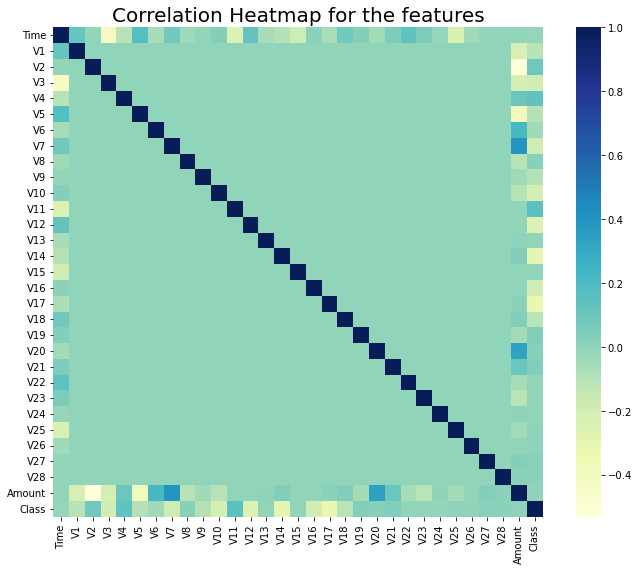

In [9]:
cor = cc.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(cor, square= True, cmap ='YlGnBu')
plt.title('Correlation Heatmap for the features', fontsize=20)

Linear correlation between features is close to 0

In [10]:
# Determine number of fraud cases in dataset
fraud = cc[cc['Class'] == 1]
valid = cc[cc['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(cc[cc['Class'] == 1])))
print('Valid Transactions: {}'.format(len(cc[cc['Class'] == 0])))


0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
        1.e+06]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

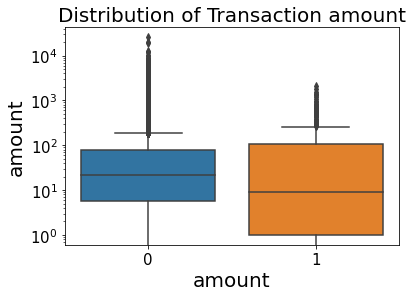

In [11]:
#analysis of fraud by the total amount spent
plt.figure()
plt.yscale('log')
sns.set_context({"figure.figsize":(12,9)})
g = sns.boxplot(data = cc , x = 'Class', y='Amount')
plt.title("Distribution of Transaction amount", fontsize = 20)
plt.xlabel("amount", fontsize=20); plt.xticks(fontsize=15)
plt.ylabel("amount", fontsize=20); plt.yticks(fontsize=15)

(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000., 2250.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

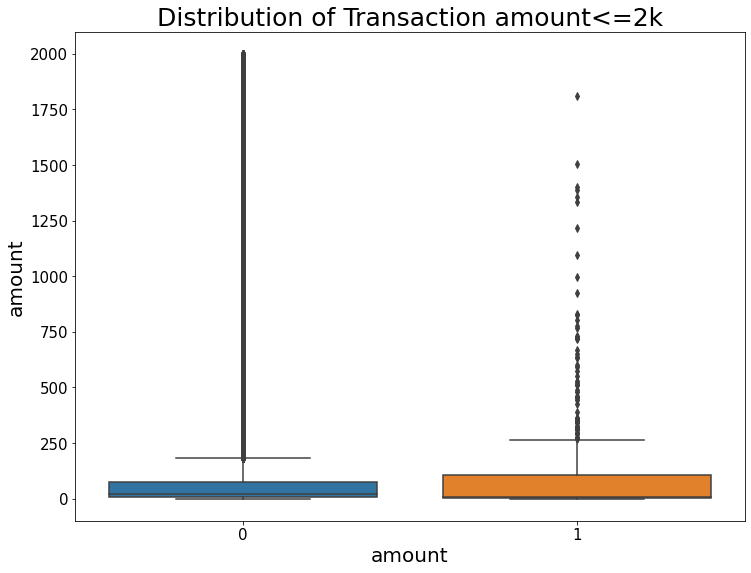

In [12]:
#transactions less than 2K
plt.figure()
sns.set_context({"figure.figsize":(12,9)})
g= sns.boxplot(data=cc.loc[cc.Amount <=2000,:], x='Class',y='Amount')
plt.title("Distribution of Transaction amount<=2k", fontsize = 25)
plt.xlabel("amount", fontsize=20); plt.xticks(fontsize=15)
plt.ylabel("amount", fontsize=20); plt.yticks(fontsize=15)

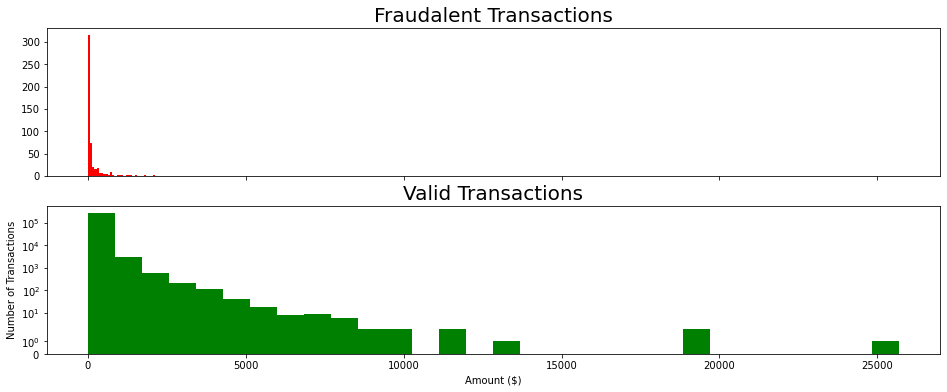

In [13]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,6))

ax1.hist(cc.Amount[cc.Class == 1], bins = 30, color='red')
ax1.set_title('Fraudalent Transactions', fontsize=20)

ax2.hist(cc.Amount[cc.Class == 0], bins = 30, color='green')
ax2.set_title('Valid Transactions', fontsize=20)
plt.yscale('symlog')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
# plt.yscale('log')
plt.show()

In [14]:
cc['Hour'] = cc['Time'].apply(lambda x : np.floor(x/3600))


tmp = cc.groupby(['Hour','Class'])['Amount'].aggregate(['min','max','median','var','sum','count','mean' ]).reset_index()
df = pd.DataFrame(tmp)
df.columns =['Hour','Class','min','max','transactions','sum','mean','median','var']
df.head()

,Hour,Class,min,max,transactions,sum,mean,median,var
0,0.0,0,0.0,7712.43,12.990,45615.821201,256572.87,3961,64.774772
1,0.0,1,0.0,529.00,264.500,139920.500000,529.00,2,264.500000
2,1.0,0,0.0,1769.69,22.820,20053.615770,145806.76,2215,65.826980
3,1.0,1,59.0,239.93,149.465,16367.832450,298.93,2,149.465000
4,2.0,0,0.0,4002.88,17.900,45355.430437,106989.39,1555,68.803466


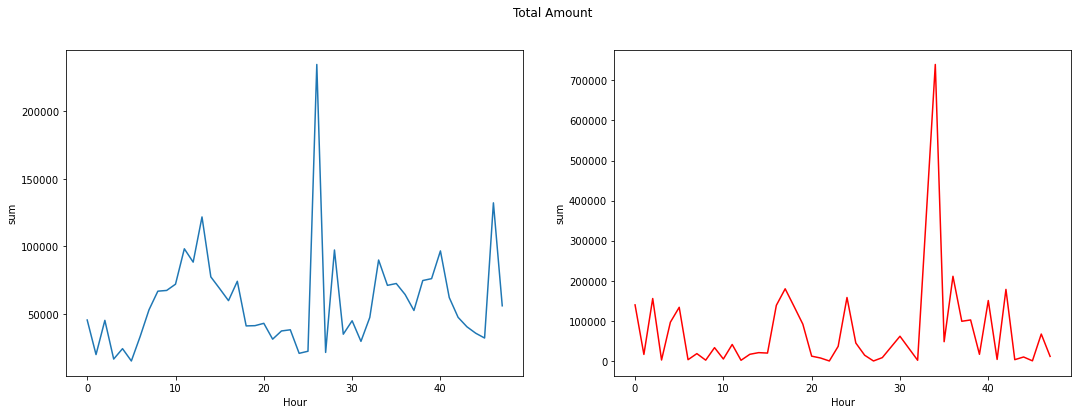

In [15]:
fig,( ax1,ax2) = plt.subplots(ncols=2, figsize=(18,6))

s = sns.lineplot(ax=ax1, x='Hour', y='sum', data=df.loc[df.Class==0])
s = sns.lineplot(ax=ax2, x ='Hour', y='sum',data = df.loc[df.Class==1], color='red')
plt.suptitle('Total Amount')
plt.show()

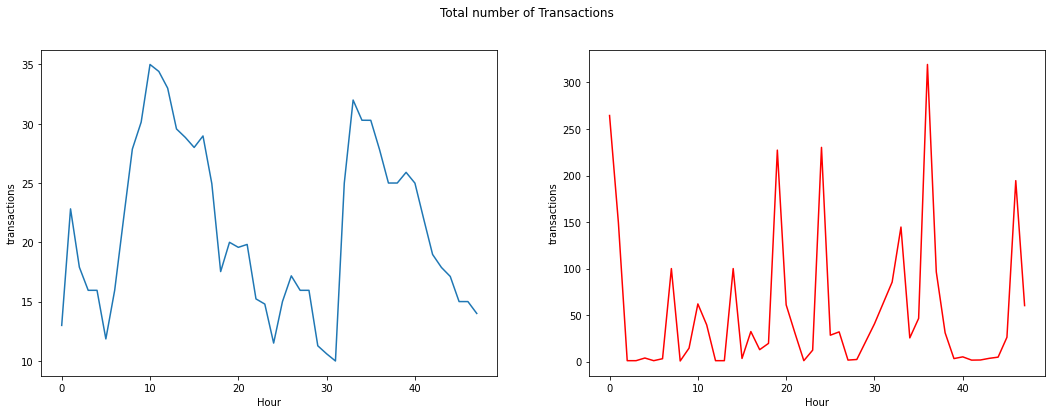

In [16]:
fig, (ax1,ax2)= plt.subplots(ncols=2, figsize=(18,6))

s = sns.lineplot(ax=ax1, x='Hour', y ='transactions', data=df.loc[df.Class==0])
s = sns.lineplot(ax=ax2, x='Hour', y ='transactions', data=df.loc[df.Class==1], color='red')
plt.suptitle('Total number of Transactions')
plt.show()

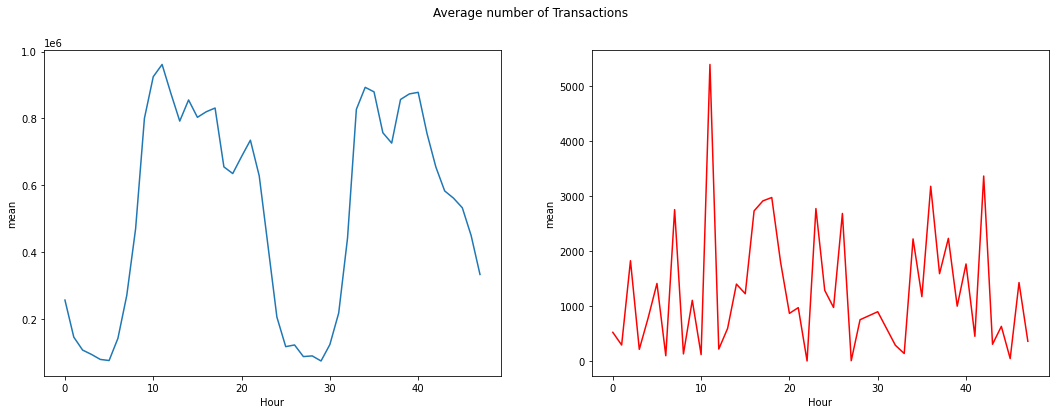

In [17]:
fig, (ax1,ax2)= plt.subplots(ncols=2, figsize=(18,6))

s = sns.lineplot(ax=ax1, x='Hour', y ='mean', data=df.loc[df.Class==0])
s = sns.lineplot(ax=ax2, x='Hour', y ='mean', data=df.loc[df.Class==1], color='red')
plt.suptitle('Average number of Transactions')
plt.show()

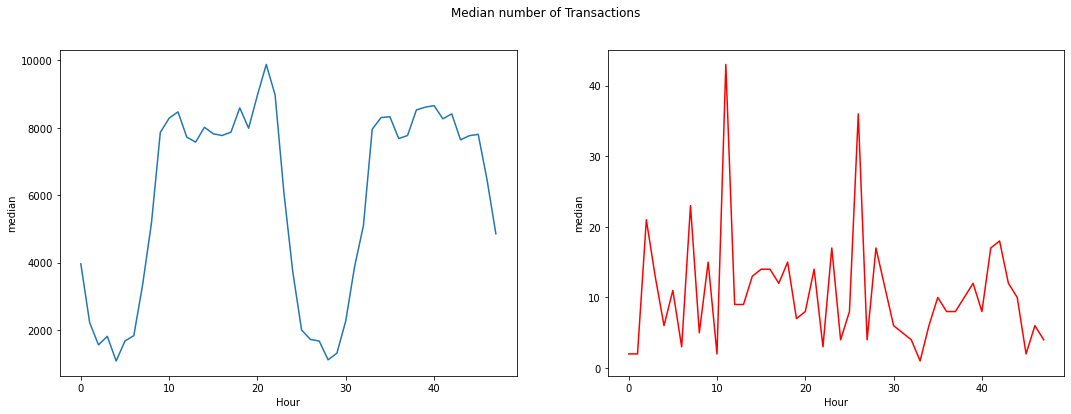

In [18]:
fig, (ax1,ax2)= plt.subplots(ncols=2, figsize=(18,6))

s = sns.lineplot(ax=ax1, x='Hour', y ='median', data=df.loc[df.Class==0])
s = sns.lineplot(ax=ax2, x='Hour', y ='median', data=df.loc[df.Class==1], color='red')
plt.suptitle('Median number of Transactions')
plt.show()

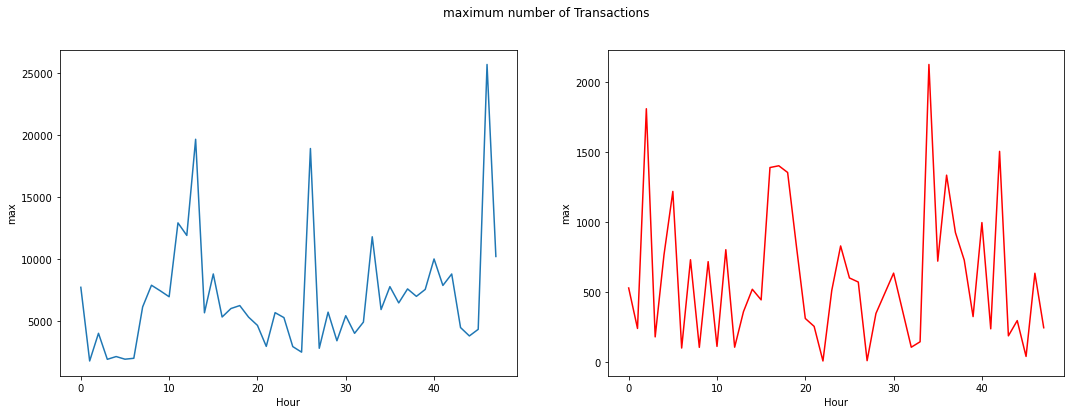

In [19]:
fig, (ax1,ax2)= plt.subplots(ncols=2, figsize=(18,6))

s = sns.lineplot(ax=ax1, x='Hour', y ='max', data=df.loc[df.Class==0])
s = sns.lineplot(ax=ax2, x='Hour', y ='max', data=df.loc[df.Class==1], color='red')
plt.suptitle('maximum number of Transactions')
plt.show()

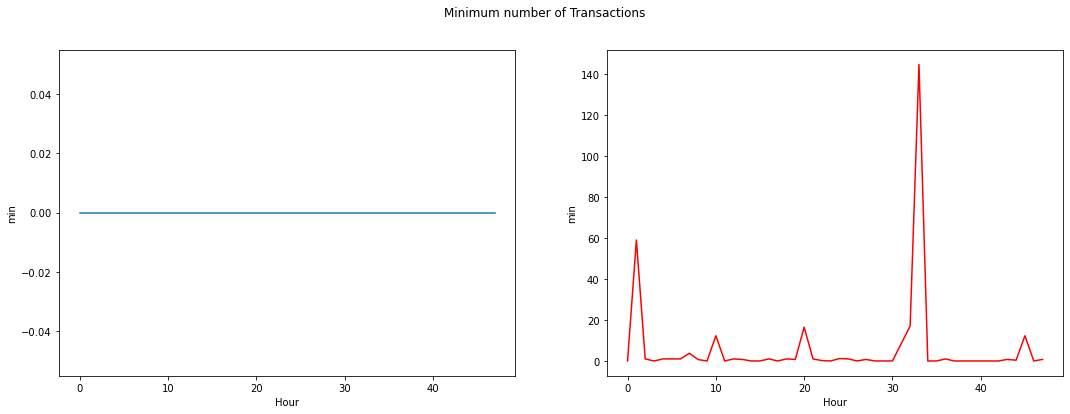

In [20]:
fig, (ax1,ax2)= plt.subplots(ncols=2, figsize=(18,6))

s = sns.lineplot(ax=ax1, x='Hour', y ='min', data=df.loc[df.Class==0])
s = sns.lineplot(ax=ax2, x='Hour', y ='min', data=df.loc[df.Class==1], color='red')
plt.suptitle('Minimum number of Transactions')
plt.show()

In [21]:
tmp = cc[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
class_0.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [22]:
class_1.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

The real transaction have a larger mean value, larger Q1, smaller Q3 and Q4 and larger outliers; fraudulent transactions have a smaller Q1 and mean, larger Q4 and smaller outliers.

Let's plot the fraudulent transactions (amount) against time. The time is shown is seconds from the start of the time period (totaly 48h, over 2 days).

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

<Figure size 864x648 with 0 Axes>

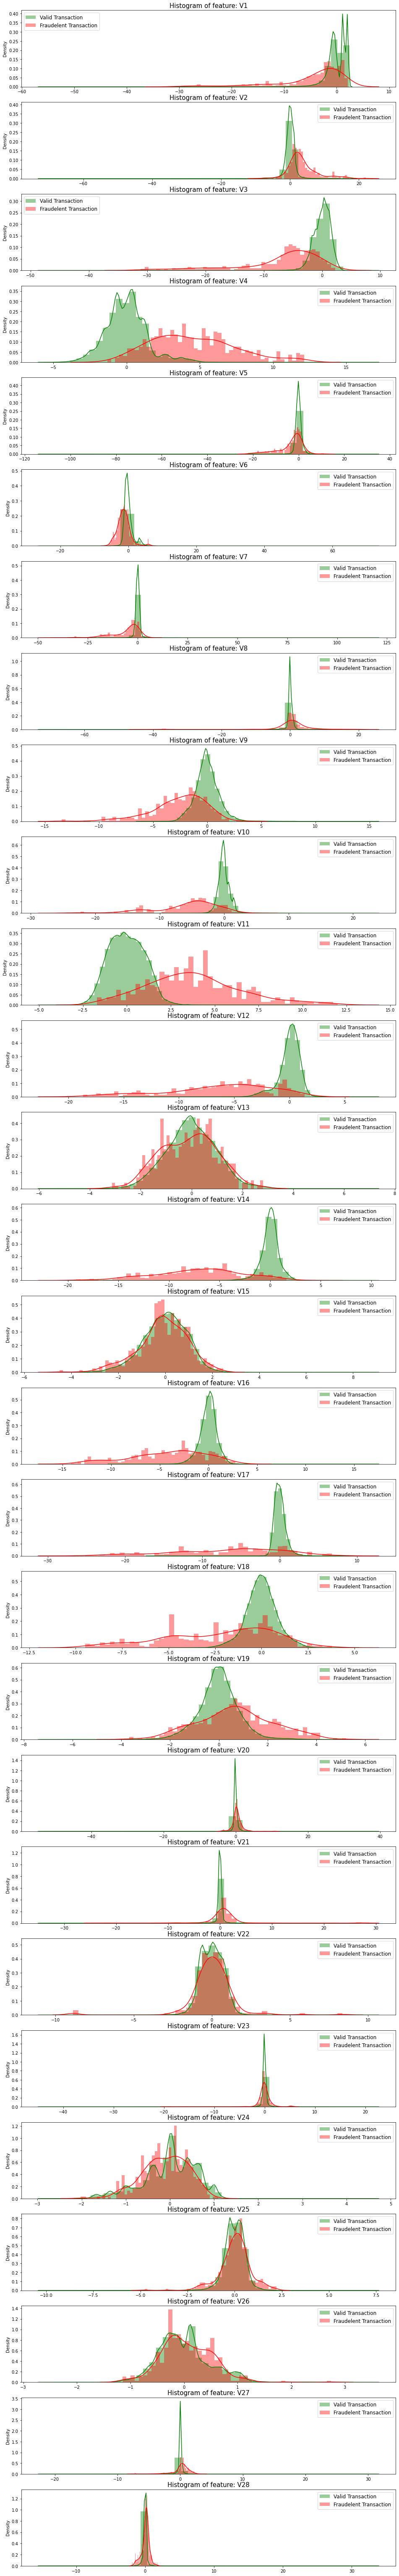

In [23]:
import matplotlib.gridspec as gridspec
plt.clf()
pca_features = cc.columns[1:29]
plt.figure(figsize=(16,28*4))
gs = gridspec.GridSpec(28, 1)
for i, col in enumerate(cc[pca_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(cc[col][cc.Class == 0], bins=50, label='Valid Transaction', color='green')
    sns.distplot(cc[col][cc.Class == 1], bins=50, label='Fraudelent Transaction', color='red')
    ax.set_xlabel('')
    ax.set_title('Histogram of feature: ' + str(col),fontsize=15)
    plt.legend(loc='best',fontsize=12)
plt.show()


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
      
    

In [24]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

In [27]:
VALID_SIZE = 0.20
TEST_SIZE = 0.20 

RANDOM_STATE = 2018


train_df, test_df = train_test_split(cc, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

## RandomForestClassifier

In [28]:
num_trees = 100
max_features = 4

In [41]:
kfold = KFold( n_splits = 5, shuffle= True, random_state= 7)
model = RandomForestClassifier(n_estimators = num_trees, max_features = max_features, criterion = 'gini',  verbose=False)
model.fit( train_df[predictors], train_df[target].values)
results = cross_val_score(model, train_df[predictors],train_df[target], cv= kfold)
print(results.mean())

0.9996214526089879


In [39]:
clf = RandomForestClassifier(n_jobs=4, 
                             random_state=2018,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)

In [40]:
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_jobs=4, random_state=2018, verbose=False)

In [42]:
preds = clf.predict(valid_df[predictors])

##### Feature Importance

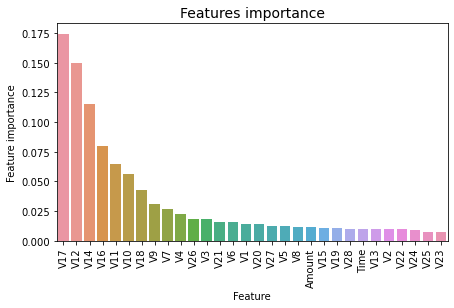

In [46]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   


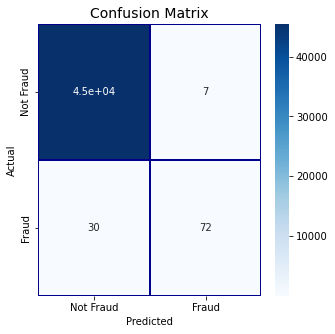

In [44]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [45]:
roc_auc_score(valid_df[target].values, preds)

0.8528641975628091